# THỰC HÀNH: CÁC GIẢI THUẬT PHÂN CỤM CƠ BẢN

## 3.1. GIẢI THUẬT K-MEANS

### 3.1.1. Bài tập mẫu

### Bài toán 1: Thực hiện các nhiệm vụ trong bài toán 1 để làm quen với việc xây dựng mô hình dựa vào thuật toán phân cụm K-Means trên tập dữ liệu Mall-Customer. Dữ liệu lấy tại https://www.kaggle.com/code/fadymamdouh01/mall-customer-segmentation-data-clustering

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df = pd.read_csv('Mall_Customers.csv')
# Transform Gender to 0's and 1's
df['Gender'] = df['Gender'].map({'Male': 1, "Female": 0})
df.info()
# Data for cluster
X = df.iloc[:, -4:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [11]:
# We will create K-Means Models `iteratively between k values of 3 to 10` and at each step, capture the `Silhoutte Score` and `Inertia (Sum of Squared Distances)`
km_inertias, km_scores = [], []
for k in range(3, 10):
 km = KMeans(n_clusters=k).fit(X)
 km_inertias.append(km.inertia_)
 km_scores.append(silhouette_score(X, km.labels_))
print(
    f"Processing K-Means with k = {k}, "
    f"Inertia = {km.inertia_}, "
    f"Silhouette Score = {silhouette_score(X, km.labels_)}")
km_inertias

Processing K-Means with k = 9, Inertia = 40621.19205794204, Silhouette Score = 0.41494222767345024


[143391.59236035674,
 104422.83498539754,
 75528.58656469136,
 69490.85843465145,
 54696.82031001335,
 47601.77515491045,
 40621.19205794204]

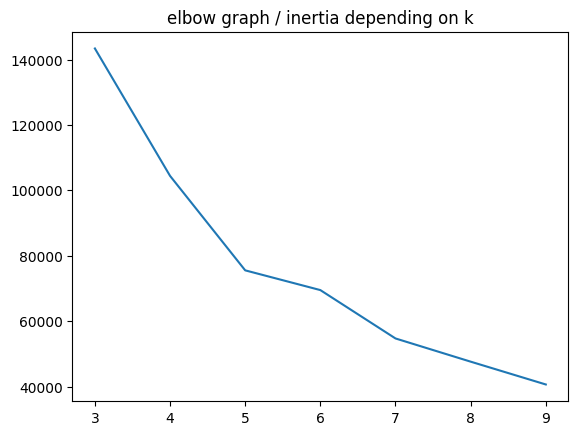

In [12]:
# sns.lineplot(range(3, 10), km_inertias) PHUOCNT
sns.lineplot(x=range(3, 10), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

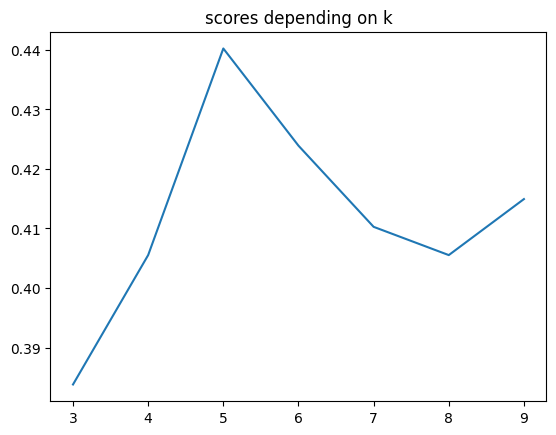

In [13]:
sns.lineplot(x=range(3, 10), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [16]:
km = KMeans(n_clusters=6).fit(X)
#Assign the Cluster Labels to the Data
X['Label'] = km.labels_
#Info for each cluster
for k in range(6):
 print(f'Cluster nb : {k}')
 print(X[X.Label == k].describe().iloc[:, 1:-1])
 print('\n\n')

Cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
std     3.728650           16.312485                9.364489
min    27.000000           69.000000               63.000000
25%    30.000000           75.500000               74.500000
50%    32.000000           79.000000               83.000000
75%    35.500000           95.000000               90.000000
max    40.000000          137.000000               97.000000



Cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count   9.000000            9.000000                9.000000
mean   28.333333           88.666667                7.777778
std     7.549834           21.834606                5.472152
min    19.000000           73.000000                1.000000
25%    20.000000           77.000000                5.000000
50%    32.000000           78.000000                

### Bài toán 2: Thực hiện phân cụm dữ liệu trên tập dữ liệu iris-data. Dữ liệu lấy từ lấy từ https://www.kaggle.com/code/xvivancos/tutorial-knn-in-the-iris-data-set

In [19]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans  # ✅ Sửa lại đúng tên class

# Đọc dữ liệu
iris = pd.read_csv("Iris.csv")
iris.drop('Id', inplace=True, axis=1)

# Tách dữ liệu X (features) và y (labels để vẽ minh họa)
X = iris.iloc[:, :-1].values  
y = iris.iloc[:, -1].values  

# Xem trước dữ liệu
iris.head().style.background_gradient(cmap=sns.cubehelix_palette(as_cmap=True))


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


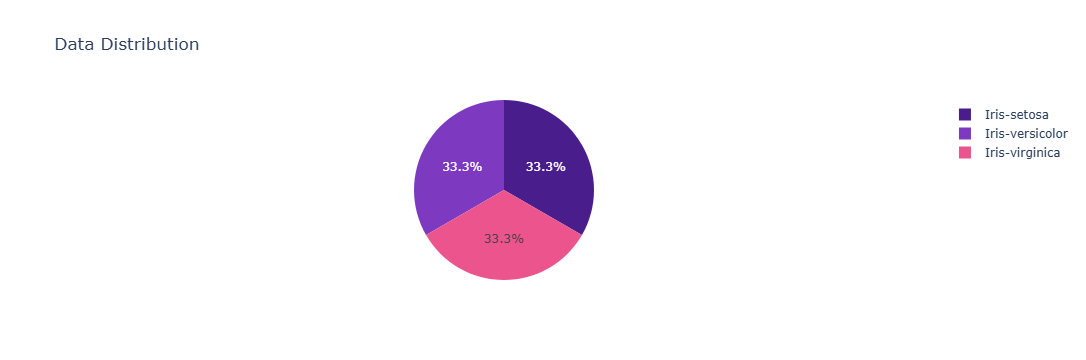

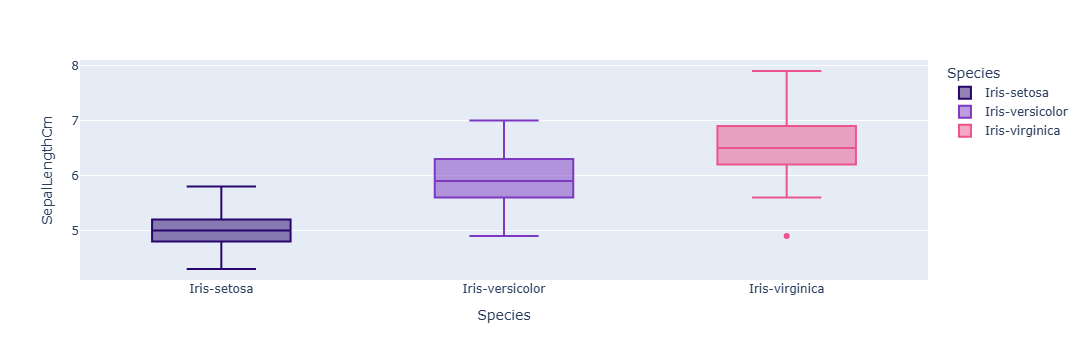

In [20]:
# Data Distribution => The Data is perfectly balanced
fig = px.pie(
    iris, 
    names='Species',
    color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],
    title='Data Distribution',
    template='plotly'
)
fig.show()

# Phân tích biến Sepal-Length với box-plot
fig = px.box(
    data_frame=iris, 
    x='Species',
    y='SepalLengthCm',
    color='Species',
    color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],
    orientation='v'
)
fig.show()


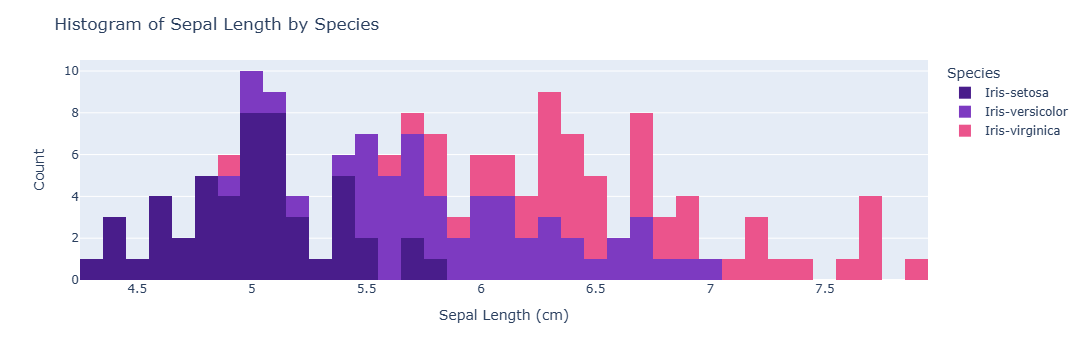

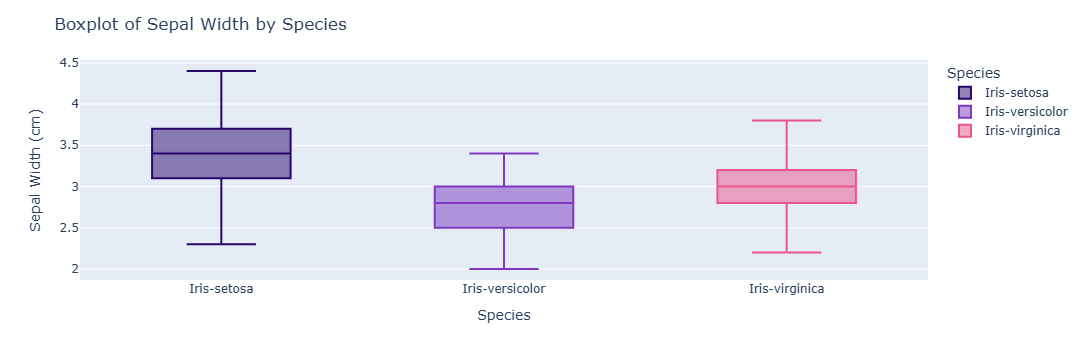

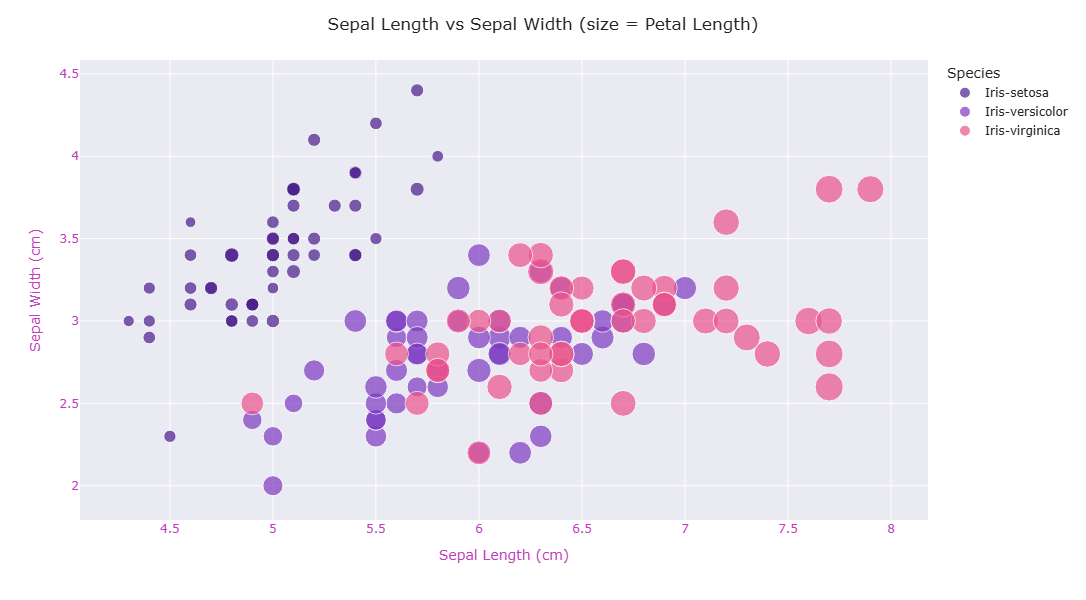

In [22]:
# Phân tích biến SepalLengthCm với histogram
fig = px.histogram(
    data_frame=iris, 
    x='SepalLengthCm',
    color='Species',
    nbins=50,
    color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],
    template='plotly'
)
fig.update_layout(
    title="Histogram of Sepal Length by Species",
    xaxis_title="Sepal Length (cm)",
    yaxis_title="Count"
)
fig.show()

# Phân tích biến SepalWidthCm với box plot
fig = px.box(
    data_frame=iris, 
    x='Species',
    y='SepalWidthCm', 
    color='Species',
    color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],
    orientation='v'
)
fig.update_layout(
    title="Boxplot of Sepal Width by Species",
    yaxis_title="Sepal Width (cm)"
)
fig.show()

# Phân tích 2 biến SepalLengthCm và SepalWidthCm với scatter
fig = px.scatter(
    data_frame=iris, 
    x='SepalLengthCm',
    y='SepalWidthCm',
    color='Species',
    size='PetalLengthCm',
    template='seaborn',
    color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C']
)
fig.update_layout(
    width=800, height=600,
    title="Sepal Length vs Sepal Width (size = Petal Length)",
    xaxis=dict(title="Sepal Length (cm)", color="#BF40BF"),
    yaxis=dict(title="Sepal Width (cm)", color="#BF40BF")
)
fig.show()


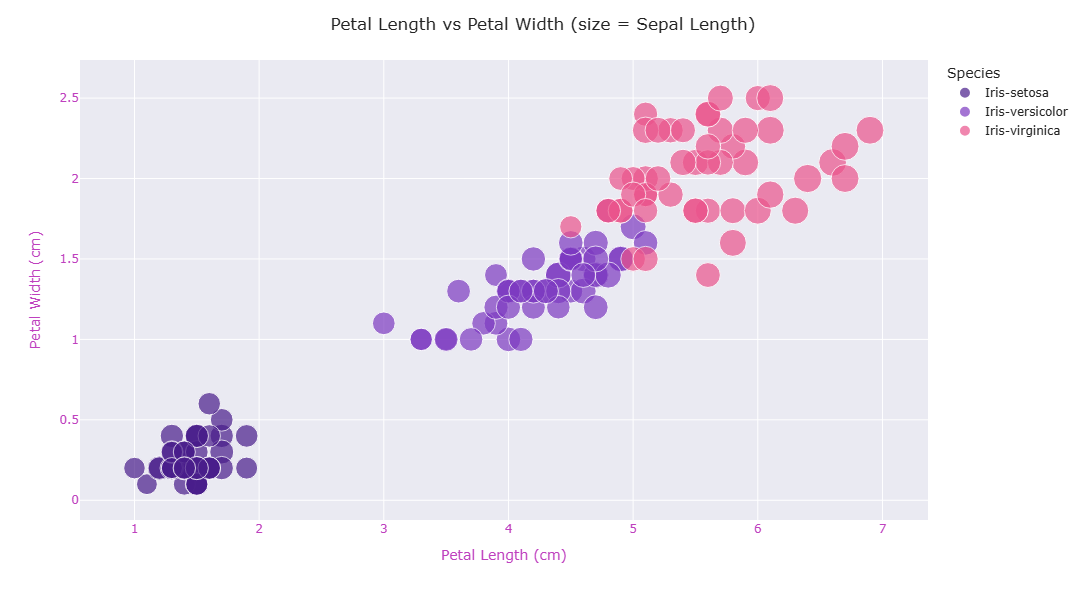

In [23]:
# Phân tích 2 biến PetalLengthCm và PetalWidthCm
fig = px.scatter(
    data_frame=iris, 
    x='PetalLengthCm',
    y='PetalWidthCm',
    color='Species',
    size='SepalLengthCm',   # kích thước điểm dựa trên SepalLengthCm
    template='seaborn',
    color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C']
)

fig.update_layout(
    width=800, height=600,
    title="Petal Length vs Petal Width (size = Sepal Length)",
    xaxis=dict(title="Petal Length (cm)", color="#BF40BF"),
    yaxis=dict(title="Petal Width (cm)", color="#BF40BF"),
    legend_title="Species"
)

fig.show()


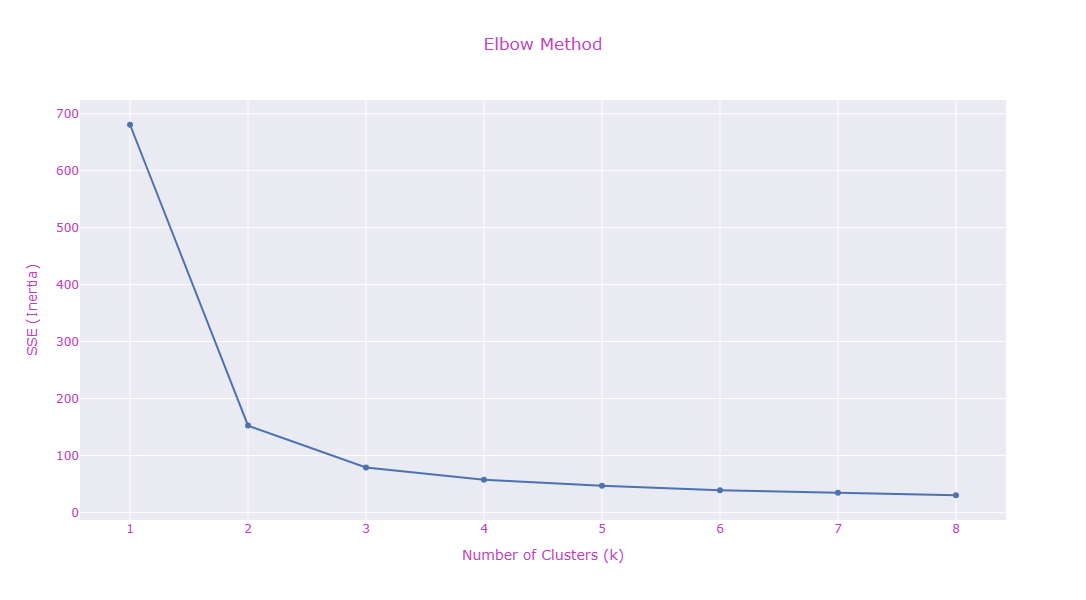

👉 Dựa trên Elbow Method, k=3 là số cluster tối ưu cho dữ liệu Iris.


In [24]:
sse = []
clusters = range(1, 9)

for i in clusters:
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Vẽ Elbow Method
fig = px.line(
    x=list(clusters), 
    y=sse, 
    markers=True,
    template="seaborn",
    title='Elbow Method'
)

fig.update_layout(
    width=800, height=600,
    title_font_color="#BF40BF",
    xaxis=dict(color="#BF40BF", title="Number of Clusters (k)"),
    yaxis=dict(color="#BF40BF", title="SSE (Inertia)"),
    showlegend=False
)

fig.show()
print("👉 Dựa trên Elbow Method, k=3 là số cluster tối ưu cho dữ liệu Iris.")


In [25]:
from sklearn.cluster import KMeans

# Khởi tạo mô hình KMeans với k=3
kmeans = KMeans(
    n_clusters=3,        # số cụm
    init='k-means++',    # phương pháp khởi tạo
    max_iter=300,        # số lần lặp tối đa
    n_init=10,           # số lần chạy với các centroid ngẫu nhiên khác nhau
    random_state=0       # để tái lập kết quả
)
# Huấn luyện mô hình và dự đoán nhãn cụm
clusters = kmeans.fit_predict(X)

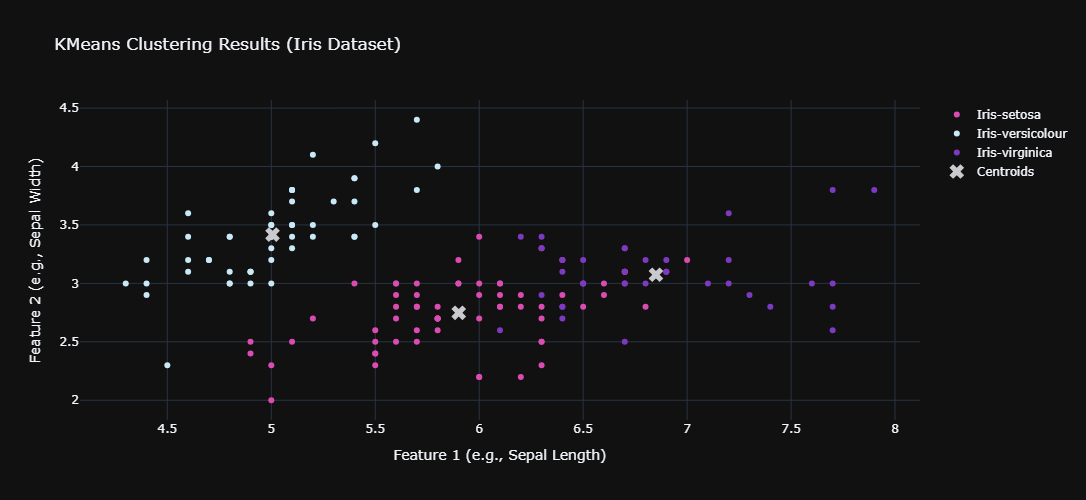

In [26]:
import plotly.graph_objects as go

fig = go.Figure()

# Cluster 0
fig.add_trace(go.Scatter(
    x=X[clusters == 0, 0], 
    y=X[clusters == 0, 1],
    mode='markers',
    marker=dict(color='#DB4CB2'),
    name='Iris-setosa'
))

# Cluster 1
fig.add_trace(go.Scatter(
    x=X[clusters == 1, 0], 
    y=X[clusters == 1, 1],
    mode='markers',
    marker=dict(color='#c9e9f6'),
    name='Iris-versicolour'
))

# Cluster 2
fig.add_trace(go.Scatter(
    x=X[clusters == 2, 0], 
    y=X[clusters == 2, 1],
    mode='markers',
    marker=dict(color='#7D3AC1'),
    name='Iris-virginica'
))

# Cluster centroids
fig.add_trace(go.Scatter(
    x=kmeans.cluster_centers_[:, 0], 
    y=kmeans.cluster_centers_[:, 1],
    mode='markers',
    marker=dict(color='#CAC9CD', size=13, symbol='x'),
    name='Centroids'
))

# Layout
fig.update_layout(
    template='plotly_dark',
    width=1000, 
    height=500,
    title='KMeans Clustering Results (Iris Dataset)',
    xaxis_title="Feature 1 (e.g., Sepal Length)",
    yaxis_title="Feature 2 (e.g., Sepal Width)"
)

fig.show()



### 3.1.3. Bài tập thực hành 1 Xây dựng mô hình phân cụm K-means trên tập dữ liệu chim cánh cụt. Dữ liệu lấy tại https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering

In [28]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


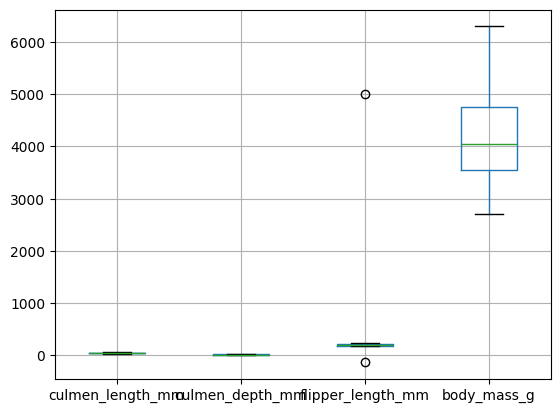

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [29]:
penguins_df.boxplot()
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]
penguins_clean = penguins_df.drop([9, 14])
penguins_clean.head()

In [30]:
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [32]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(n_components)

2


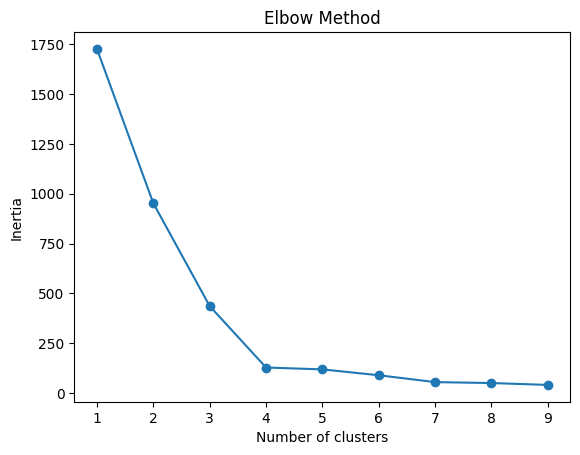

In [33]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
n_clusters = 4

### 3.1.4. Bài tập thực hành 2 Xây dựng mô hình phân cụm K-means trên tập dữ liệu mua sắm tại siêu thị. Dữ liệu lấy tại  https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering

In [14]:
import pandas as pd
import numpy as np
import sklearn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings
df = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
df['Description'] = df['Description'].fillna(0)
df['CustomerID'] = df['CustomerID'].fillna(0)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df.value_counts

<bound method DataFrame.value_counts of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice

In [18]:
df.describe()
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [20]:
df.groupby('CustomerID')['Quantity'].sum()

CustomerID
0.0        269562
12346.0         0
12347.0      2458
12348.0      2341
12349.0       631
            ...  
18280.0        45
18281.0        54
18282.0        98
18283.0      1397
18287.0      1586
Name: Quantity, Length: 4373, dtype: int64

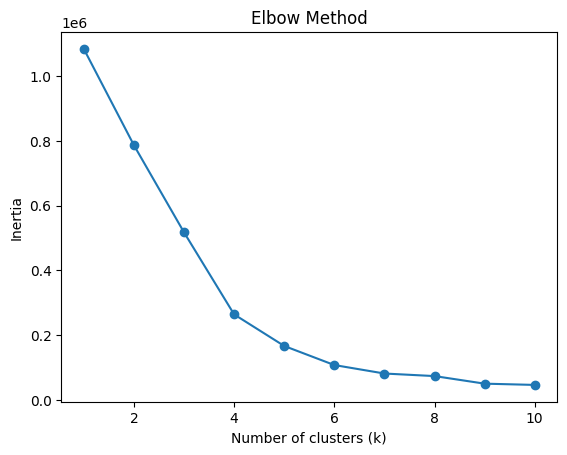

In [21]:
df.columns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
x = df[['Quantity','UnitPrice']]
x = x.dropna()
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
inertia = []
k_range = range(1, 11)  

for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(x_scaled)  # Fit K-Means model on the scaled data
    inertia.append(kmeans.inertia_)  # Inertia (sum of squared distances to centroids)

# Plot the inertia for each k
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [22]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++')
kmeans.fit(x_scaled)
df['cluster'] = kmeans.labels_
df[['Quantity', 'UnitPrice', 'cluster']].head()

,Quantity,UnitPrice,cluster
0,6,2.55,0
1,6,3.39,0
2,8,2.75,0
3,6,3.39,0
4,6,3.39,0


## 3.2. GIẢI THUẬT PHÂN CỤM ĐA CẤP

### 3.2.2. Bài làm mẫu Bài toán 1: Tìm hiểu một số khái niệm cơ bản của phân cụm đa cấp Nhiệm vụ 1: Tìm hiểu một số khái niệm cơ bản của phân cụm đa cấp

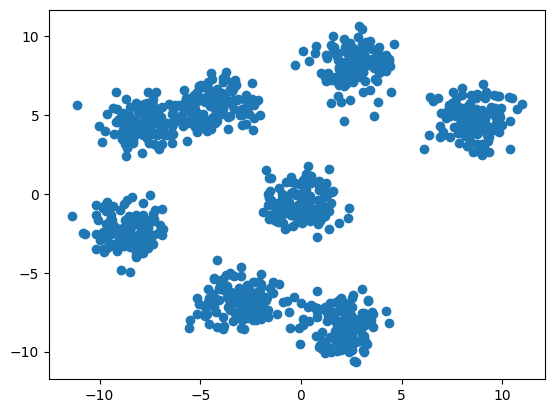

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, 
random_state=800)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [26]:
# Generate distance matrix with 'linkage' function
distances = linkage(X, method="centroid", metric="euclidean")
print(distances)


[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


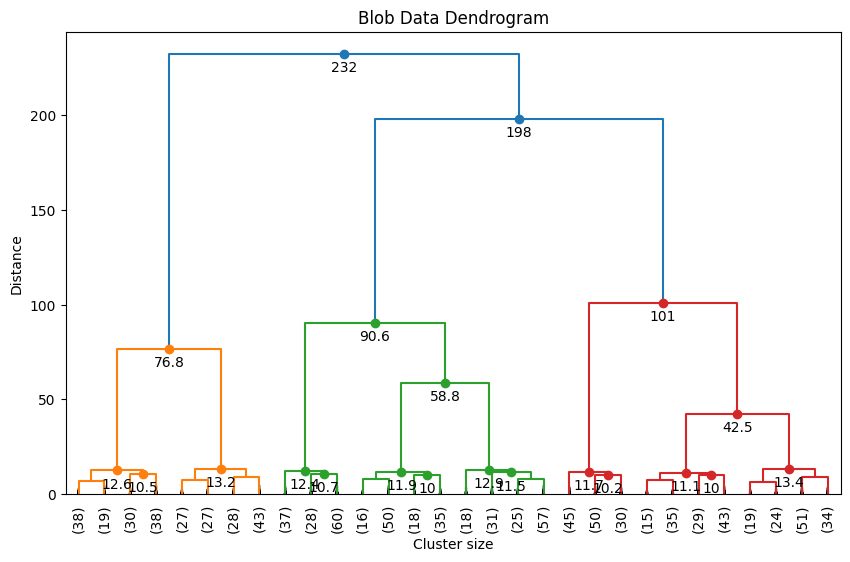

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Hàm vẽ dendrogram có chú thích đẹp hơn
def annotated_dendrogram(*args, **kwargs):
    # Standard dendrogram từ SciPy
    scipy_dendro = dendrogram(
        *args,
        truncate_mode='lastp',
        show_contracted=True,
        leaf_rotation=90.,
        **kwargs
    )
    
    plt.title('Blob Data Dendrogram')
    plt.xlabel('Cluster size')
    plt.ylabel('Distance')

    # Thêm annotation cho các nhánh trên ngưỡng
    for i, d, c in zip(scipy_dendro['icoord'], 
                       scipy_dendro['dcoord'], 
                       scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 10:  # chỉ annotate các nhánh lớn
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), 
                         xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    return scipy_dendro

# Tạo linkage matrix
Z = linkage(X, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(10, 6))
dn = annotated_dendrogram(Z)
plt.show()


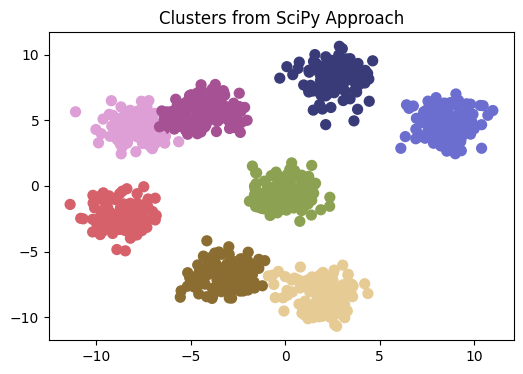

In [30]:
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.figure(figsize=(6,4))
plt.title("Clusters from SciPy Approach")
plt.scatter(X[:, 0], X[:, 1], c = scipy_clusters ,s=50, cmap='tab20b')
plt.show()

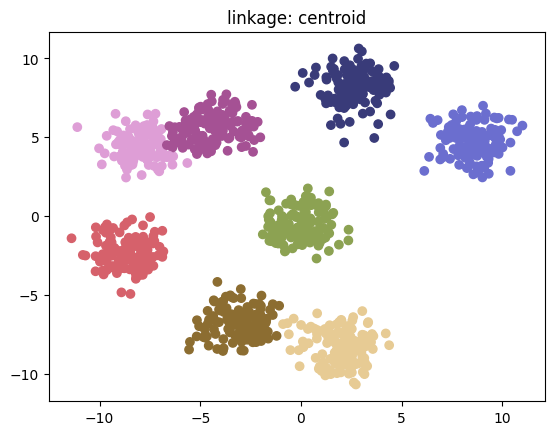

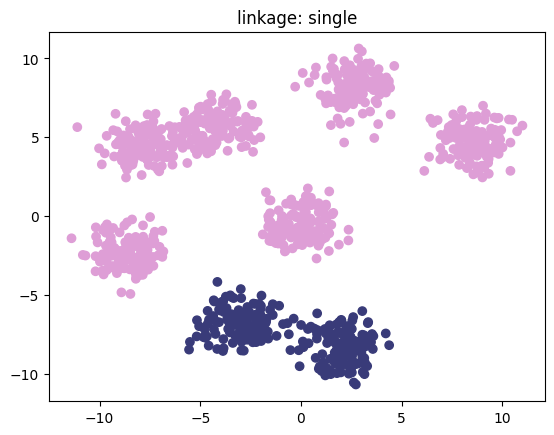

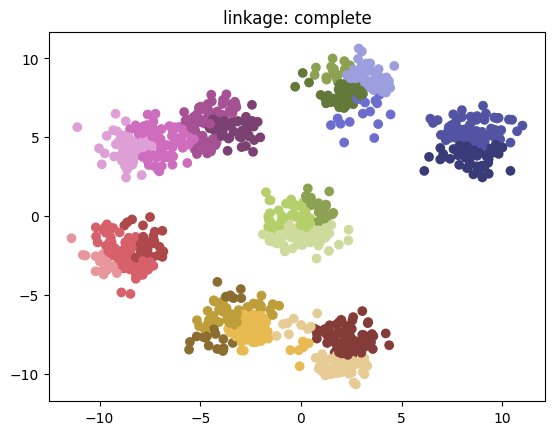

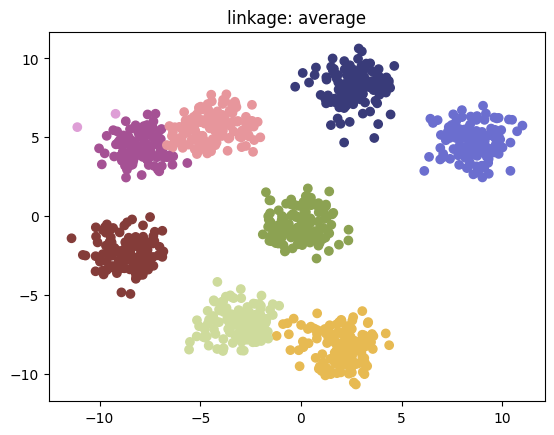

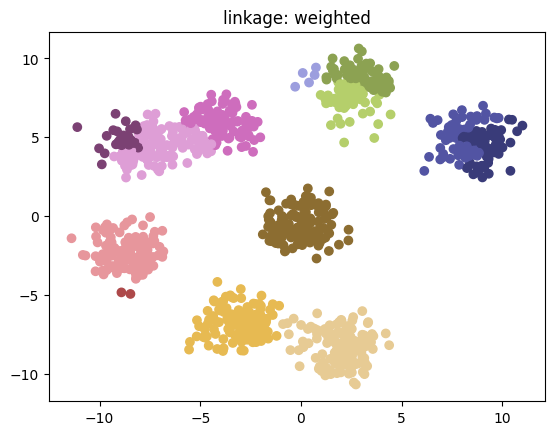

In [31]:
methods = ['centroid', 'single', 'complete', 'average', 'weighted']
for method in methods:
 distances = linkage(X, method=method, metric="euclidean")
 clusters = fcluster(distances, 3, criterion="distance") 
 plt.title('linkage: ' + method)
 plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20b')
 plt.show()

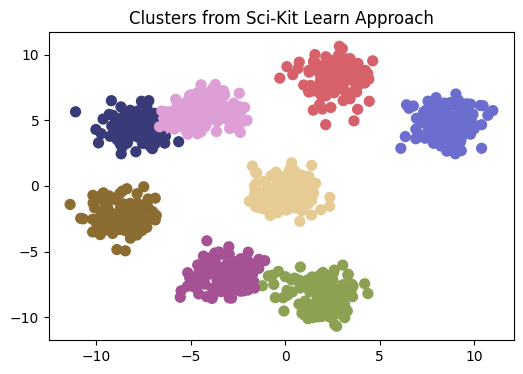

In [32]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
ac = AgglomerativeClustering(n_clusters = 8, linkage="average")
#distances = linkage(X, method="centroid", metric="euclidean")
sklearn_clusters = ac.fit_predict(X)
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.figure(figsize=(6,4))
plt.title("Clusters from Sci-Kit Learn Approach")
plt.scatter(X[:, 0], X[:, 1], c = sklearn_clusters ,s=50, cmap='tab20b')
plt.show()

### Bài toán 2: Phân cụm đa cấp trên tập dữ liệu rượu vang. Dữ liệu lấy từ  https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering/data

In [34]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
wine_df = pd.read_csv("wine_data.csv")


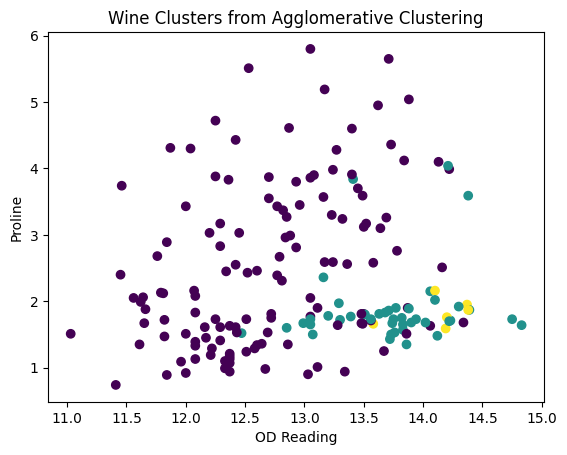

In [35]:
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)
# Hiển thị các cụm sau khi phân cấp theo cách tiếp cận của scikit-learn
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=ac_clusters)
plt.title("Wine Clusters from Agglomerative Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

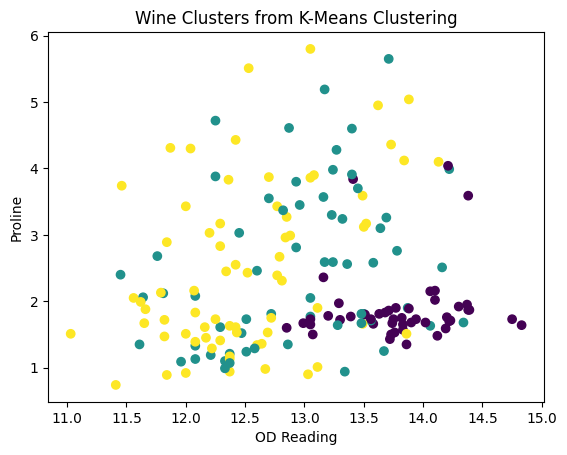

In [36]:
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)
# Hiển thị kết quả sau khi phân cụm K-mean
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_clusters)
plt.title("Wine Clusters from K-Means Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [37]:
# Calculate Silhouette Scores
print("Silhouette Scores for Wine Dataset:\n")
print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))
print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))

Silhouette Scores for Wine Dataset:

K-Means Clustering:  0.571138193786884
Agg Clustering:  0.6100753288756409


### 3.2.3. Bài tập thực hành 1 Xây dựng mô hình phân cụm đa cấp trên tập dữ liệu chim cánh cụt. Dữ liệu lấy tại  https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering

<Axes: >

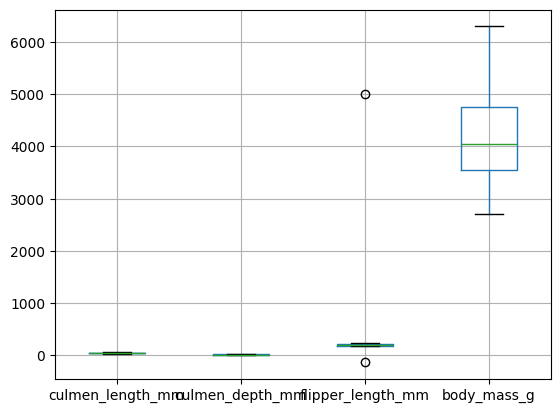

In [41]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()
warnings.filterwarnings("ignore", category=FutureWarning)
penguins_df.boxplot()

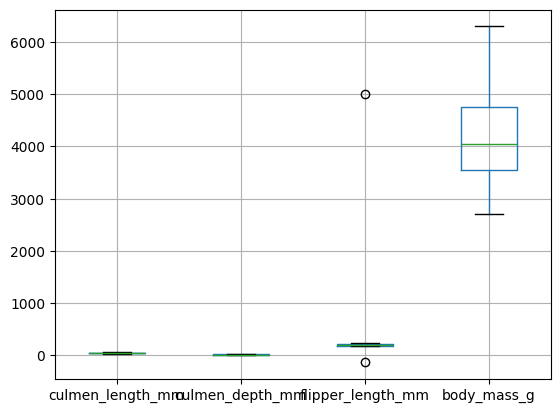

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [44]:
penguins_df.boxplot()
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]
penguins_clean = penguins_df.drop([9, 14])
penguins_clean.head()
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

In [46]:
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [48]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(n_components)

2


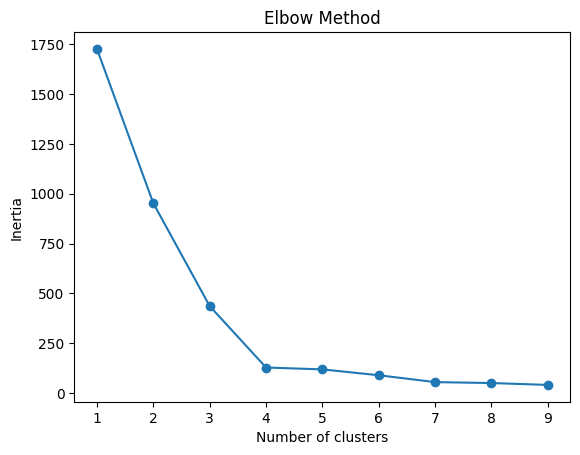

In [49]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
n_clusters = 4

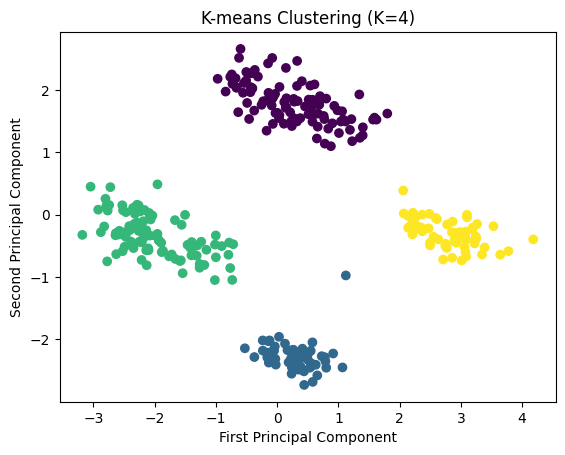

In [50]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

### 3.2.4. Bài tập thực hành 2 Xây dựng mô hình phân cụm đa cấp trên tập dữ liệu mua sắm tại siêu thị. Dữ liệu lấy tại  https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering

In [52]:
import pandas as pd
import numpy as np
import sklearn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings
df = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [53]:
df.isnull().sum()
df['Description'] = df['Description'].fillna(0)
df['CustomerID'] = df['CustomerID'].fillna(0)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [54]:
df.value_counts

<bound method DataFrame.value_counts of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice

In [55]:
df.describe()
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [56]:
df.groupby('CustomerID')['Quantity'].sum()

CustomerID
0.0        269562
12346.0         0
12347.0      2458
12348.0      2341
12349.0       631
            ...  
18280.0        45
18281.0        54
18282.0        98
18283.0      1397
18287.0      1586
Name: Quantity, Length: 4373, dtype: int64

In [57]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

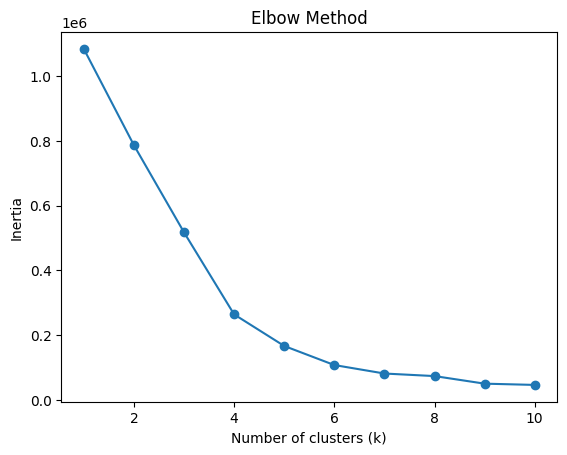

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
x = df[['Quantity','UnitPrice']]
x = x.dropna()
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
inertia = []
k_range = range(1, 11)  

for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(x_scaled)  # Fit K-Means model on the scaled data
    inertia.append(kmeans.inertia_)  # Inertia (sum of squared distances to centroids)

# Plot the inertia for each k
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [59]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++')
kmeans.fit(x_scaled)
df['cluster'] = kmeans.labels_
df[['Quantity', 'UnitPrice', 'cluster']].head()

,Quantity,UnitPrice,cluster
0,6,2.55,0
1,6,3.39,0
2,8,2.75,0
3,6,3.39,0
4,6,3.39,0


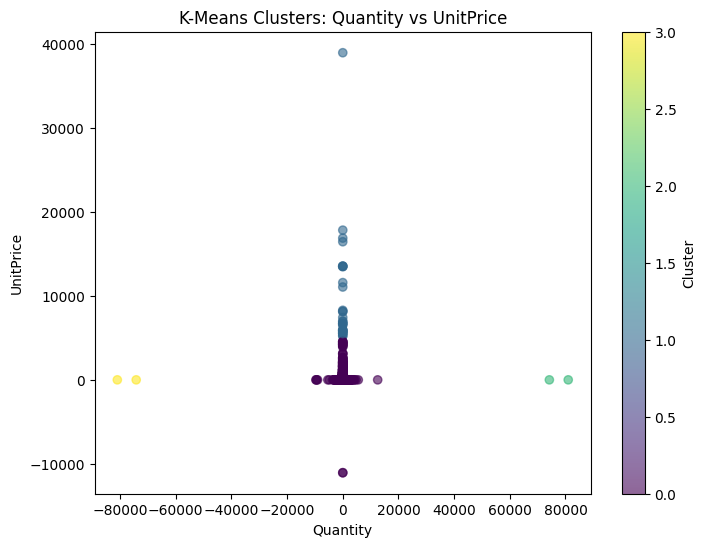

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clusters: Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.colorbar(label='Cluster')  